In [110]:
#importing all necessary packages. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import score
plt.rcParams['figure.figsize'] = (10.0,7.0)
plt.rcParams['figure.constrained_layout.use']= True
plt.rc('font',size=18)

#Importing the dataset from file name heart.csv
df = pd.read_csv('television.csv',skiprows=3)
df.info()

ImportError: cannot import name 'score' from 'sklearn.metrics' (C:\Users\gowtham\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [66]:
df.describe()
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Argentina,70.5,4,370.0,74.0,67.0
1,Bangladesh,53.5,315,6166.0,53.0,54.0
2,Brazil,65.0,4,684.0,68.0,62.0
3,Canada,76.5,1.7,449.0,80.0,73.0
4,China,70.0,8,643.0,72.0,68.0


In [67]:
# adding column name to the respective columns 
df.columns =['Country', 'Life_expectancy', 'People_per_television', 'People_per_physician','Female _life_expectancy','Male life expectancy']
df.head()

,Country,Life_expectancy,People_per_television,People_per_physician,Female _life_expectancy,Male life expectancy
0,Argentina,70.5,4,370.0,74.0,67.0
1,Bangladesh,53.5,315,6166.0,53.0,54.0
2,Brazil,65.0,4,684.0,68.0,62.0
3,Canada,76.5,1.7,449.0,80.0,73.0
4,China,70.0,8,643.0,72.0,68.0


In [76]:
df_new = df[['People_per_physician','Life_expectancy']]
df_new.head()

,People_per_physician,Life_expectancy
0,370.0,70.5
1,6166.0,53.5
2,684.0,65.0
3,449.0,76.5
4,643.0,70.0


In [75]:
df_new.shape

(187, 2)

In [85]:
df_new = df_new.dropna()
df_new.shape

(40, 2)

In [86]:
X=np.array(df_new.iloc[:,0])
X=X.reshape(-1,1)
Y=np.array(df_new.iloc[:,1])
Y=Y.reshape(-1,1)

In [97]:
#Since the given dataset has different range of value it is required to perform normalization.
#Normalising the given dataset.
#First converting all the negative values in 'Y' by adding each value in 'Y' with the lowest value possible.   
min_value1=Y.min()
Y_new = Y-min_value1
#Second normalizing the dataset within the range 0 to 1 by making use of min/max method.
mini=Y_new.min()
maxi=Y_new.max()
Y_new= Y_new/maxi
print(Y_new)

[[0.69090909]
 [0.07272727]
 [0.49090909]
 [0.90909091]
 [0.67272727]
 [0.70909091]
 [0.32727273]
 [0.        ]
 [0.96363636]
 [0.89090909]
 [0.21818182]
 [0.34545455]
 [0.47272727]
 [0.98181818]
 [1.        ]
 [0.34545455]
 [0.67272727]
 [0.67272727]
 [0.74545455]
 [0.47272727]
 [0.10909091]
 [0.18181818]
 [0.47272727]
 [0.47272727]
 [0.78181818]
 [0.74545455]
 [0.63636364]
 [0.45454545]
 [0.98181818]
 [0.05454545]
 [0.85454545]
 [0.03636364]
 [0.61818182]
 [0.67272727]
 [0.69090909]
 [0.89090909]
 [0.87272727]
 [0.83636364]
 [0.49090909]
 [0.09090909]]


In [99]:
#Now normalizing the value of 'X' using the same method of min/max and coverting the input range from 0 to 1.
max_value= X.max()
min_value= X.min()
print(X.max(),X.min())
X_new= (X-min_value)/(max_value-min_value)
print (X_new)

36660.0 226.0
[[3.95235220e-03]
 [1.63034528e-01]
 [1.25706757e-02]
 [6.12065653e-03]
 [1.14453532e-02]
 [3.63671296e-02]
 [1.07042872e-02]
 [1.00000000e+00]
 [4.85809958e-03]
 [3.29362683e-03]
 [6.16182687e-02]
 [1.97645057e-01]
 [7.59180985e-02]
 [1.92128232e-04]
 [1.05121590e-02]
 [2.02805072e-01]
 [3.95235220e-03]
 [2.30553878e-02]
 [1.02651370e-02]
 [1.27545699e-01]
 [8.94494154e-02]
 [5.86814514e-02]
 [2.16830433e-02]
 [2.29456003e-02]
 [6.97151013e-03]
 [9.13981446e-03]
 [9.05747379e-04]
 [3.05758358e-02]
 [1.34489762e-03]
 [3.38255476e-01]
 [2.02832519e-02]
 [6.86254597e-01]
 [1.27820168e-01]
 [2.64313553e-02]
 [0.00000000e+00]
 [1.05670528e-02]
 [4.88554647e-03]
 [9.60641159e-03]
 [7.87725751e-02]
 [6.30372729e-01]]


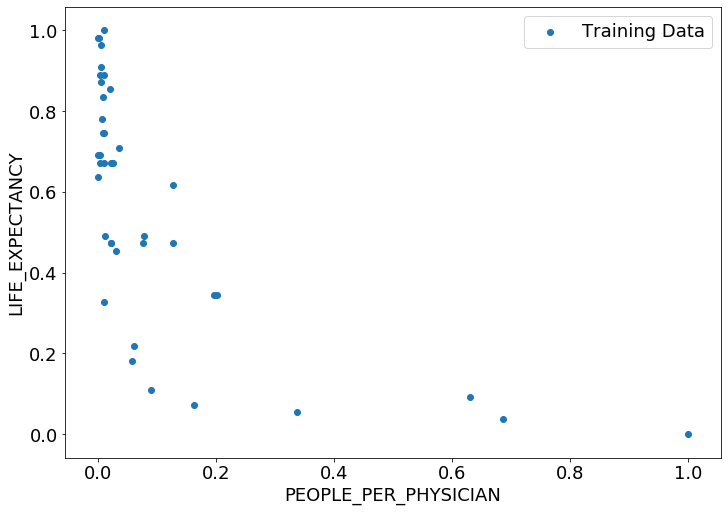

In [100]:
#Plotting the input set of data.
plt.xlabel('PEOPLE_PER_PHYSICIAN')
plt.ylabel('LIFE_EXPECTANCY')
plt.scatter(X_new,Y_new)
plt.legend(["Training Data"])
plt.show()

0.44355156514908856


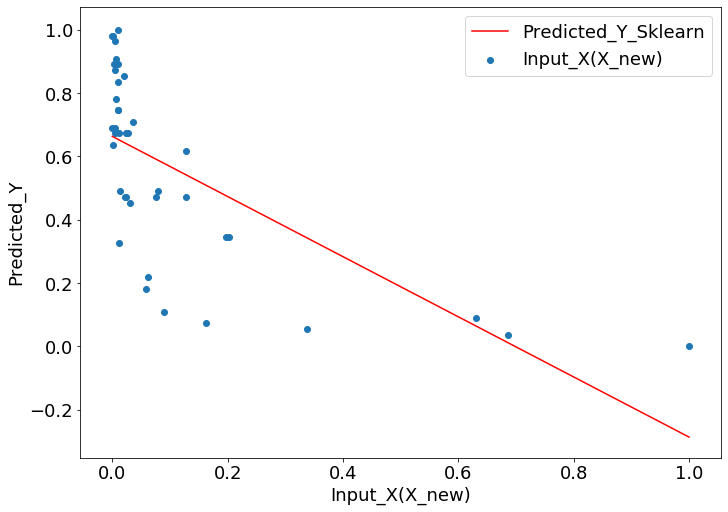

Mean Squared Error: 0.04881466888466598


In [113]:
#Using sklearn library function and calculating the 'y' value
regressor = LinearRegression()
X_train = X_new
Y_train = Y_new
regressor.fit(X_train, Y_train)
y_sklearn = regressor.predict(X_new)
print(regressor.score(X_train, Y_train))
plt.scatter(X_new, Y_new)
plt.xlabel('Input_X(X_new)')
plt.ylabel('Predicted_Y')
#plt.plot(y_sklearn, color ='red',linewidth=3)
plt.plot([max(y_sklearn), min(y_sklearn)], color ='red')
plt.legend(["Predicted_Y_Sklearn","Input_X(X_new)"])
plt.show()
print('Mean Squared Error:', metrics.mean_squared_error(Y_new, y_sklearn))